In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['Heart_disease_prediction.ipynb', 'heart.csv', '.ipynb_checkpoints', 'Mian.ipynb']


In [6]:
dataset = pd.read_csv("heart.csv")

In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])
    

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


1    165
0    138
Name: target, dtype: int64


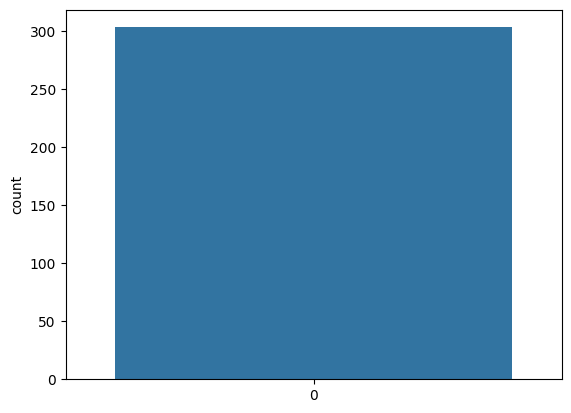

In [8]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

<AxesSubplot: ylabel='count'>

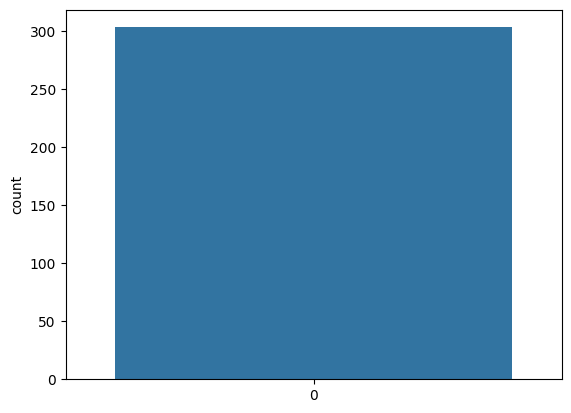

In [10]:
y = dataset["target"]

sns.countplot(y)


In [11]:
target_temp = dataset.target.value_counts()

print(target_temp)

1    165
0    138
Name: target, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [14]:
Y_test.shape

(61,)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
max_accuracy = 0


In [18]:

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [19]:
rf = RandomForestClassifier(random_state=best_x)


In [20]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=323)

In [21]:
Y_pred_rf = rf.predict(X_test)

In [22]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

In [23]:
score_rf

90.16

In [24]:
import pickle

In [36]:
import joblib

In [37]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [38]:
model = joblib.load('model_joblib_heart')

In [39]:
new_data = pd.DataFrame({
    'sex' : 0,
    'cp' : 0,
    'fbs':0,
    'restecg':1,
    'exang':0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [30]:
new_data 


,sex,cp,fbs,restecg,exang,slope,ca,thal
0,0,0,0,1,0,2,2,3


In [32]:
rf =  RandomForestClassifier()

In [33]:
p = rf.predict(new_data)
if p[0] ==0:
    print("No Disease")
else:
    print("Disease")

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [40]:
model.predict(new_data)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.